In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

Read data

In [97]:
data = pd.read_csv("Life Expectancy Data.csv")
df = data.copy()

Preprocesing data

In [98]:
display(df.isna().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [99]:
for col in df.columns:
    if(df[col].dtype == 'object'):
        df[col].fillna(df[col].mode()[0], inplace = True)
    else:
        df[col].fillna(round(df[col].mean()), inplace = True)

display(df)

C:\Users\84395\AppData\Local\Temp\ipykernel_17956\1839080240.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace = True)
C:\Users\84395\AppData\Local\Temp\ipykernel_17956\1839080240.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01               71.279624         65.0      1154   
1                64     0.01               73.523582         62.0       492   
2                66     0.01               73.219243         64.0       430   
3                69     0.01               78.184215         67.0      2787   
4                71     0.01                7.097109         68.0      3013   
...             ...      ...                     ...          ...       ...   
2933             27     4.36                0.000000         68.0        31   
2934             26     4.06                0.000000          7.0       998   
2935             25     4.43                0.000000         73.0       304   
2936             25     1.72                0.000000         76.0       529   
2937             24     1.68                0.000000         79.0      1483   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
0     ...    6.0               8.16         65.0        0.1  584.259210   
1     ...   58.0               8.18         62.0        0.1  612.696514   
2     ...   62.0               8.13         64.0        0.1  631.744976   
3     ...   67.0               8.52         67.0        0.1  669.959000   
4     ...   68.0               7.87         68.0        0.1   63.537231   
...   ...    ...                ...          ...        ...         ...   
2933  ...   67.0               7.13         65.0       33.6  454.366654   
2934  ...    7.0               6.52         68.0       36.7  453.351155   
2935  ...   73.0               6.53         71.0       39.8   57.348340   
2936  ...   76.0               6.16         75.0       42.1  548.587312   
2937  ...   78.0               7.10         78.0       43.5  547.358878   

      Population   thinness  1-19 years   thinness 5-9 years  \
0     33736494.0                   17.2                 17.3   
1       327582.0                   17.5                 17.5   
2     31731688.0                   17.7                 17.7   
3      3696958.0                   17.9                 18.0   
4      2978599.0                   18.2                 18.2   
...          ...                    ...                  ...   
2933  12777511.0                    9.4                  9.4   
2934  12633897.0                    9.8                  9.9   
2935    125525.0                    1.2                  1.3   
2936  12366165.0                    1.6                  1.7   
2937  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427      

Check again

In [100]:
display(df.isna().sum())

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

Model setup

In [101]:
target = 'Life expectancy '
x = df.drop(['Country', 'Year', 'Status', 'Life expectancy '], axis = 1)
y = df[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

Model linear regression

In [102]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

1. Tính các sai số MAE, MSE, R^2

In [103]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}\nMSE: {mse}\nR2: {r2}")

MAE: 2.868965301620964
MSE: 15.480908074556345
R2: 0.8213091149954073


2. So sánh các giá trị sai số sau khi chuẩn hóa dữ liệu và trước khi chuẩn hóa dữ liệu

Standardized data

In [104]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

Training model

In [105]:
model.fit(x_train_scaled, y_train)
y_pred_scaled = model.predict(x_test_scaled)

MAE, MSE, R2

In [106]:
mae_scaled = mean_absolute_error(y_test, y_pred_scaled)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print(f"MAE: {mae}\nMSE: {mse}\nR2: {r2}\n")

MAE: 2.868965301620964
MSE: 15.480908074556345
R2: 0.8213091149954073



3. Sử dụng kỹ thuật cross validation để tối ưu hóa các chỉ số

Model setup

In [107]:
target = 'Life expectancy '
x = df.drop(['Country', 'Year', 'Status', 'Life expectancy '], axis = 1)
y = df[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

Setup GridSearchCV

In [108]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor(random_state = 42)
cv = KFold(n_splits = 5, shuffle = True, random_state = 42)
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = cv, scoring = 'neg_mean_squared_error', n_jobs = -1)

Searching

In [109]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

Result

In [110]:
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print(f"Best parameters: {best_params}")

Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


In [111]:
y_pred = best_estimator.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")

MAE: 1.0865871247469716
MSE: 2.810092553392066
R²: 0.9675640522576493


4. Biểu diễn dữ liệu tuổi thọ của từng quốc gia tới năm 2030

Copy data

In [112]:
df1 = df.copy()

Show predictions

C:\Users\84395\AppData\Local\Temp\ipykernel_17956\773577916.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Life expectancy ', y = 'Country', data = year_data, label = f'Year {year}', orient = 'h', ci = None)


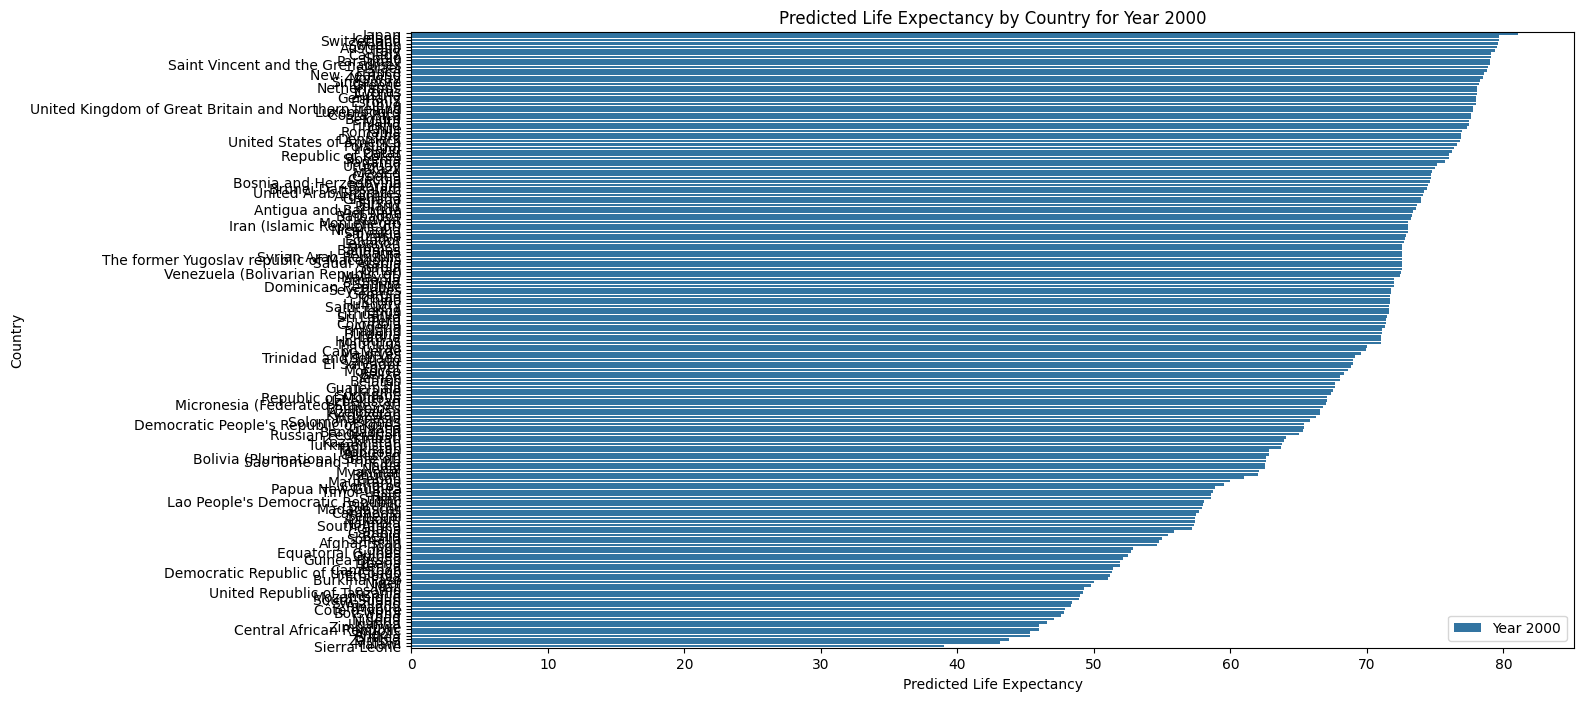

C:\Users\84395\AppData\Local\Temp\ipykernel_17956\773577916.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Life expectancy ', y = 'Country', data = year_data, label = f'Year {year}', orient = 'h', ci = None)


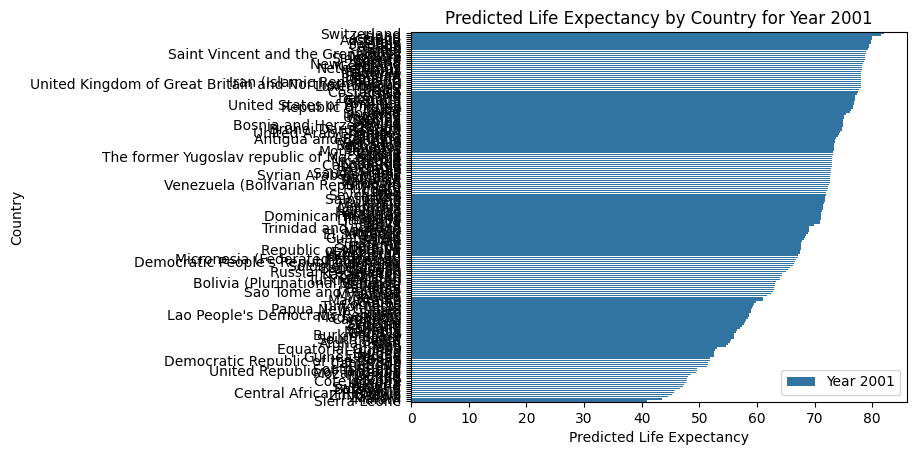

C:\Users\84395\AppData\Local\Temp\ipykernel_17956\773577916.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Life expectancy ', y = 'Country', data = year_data, label = f'Year {year}', orient = 'h', ci = None)


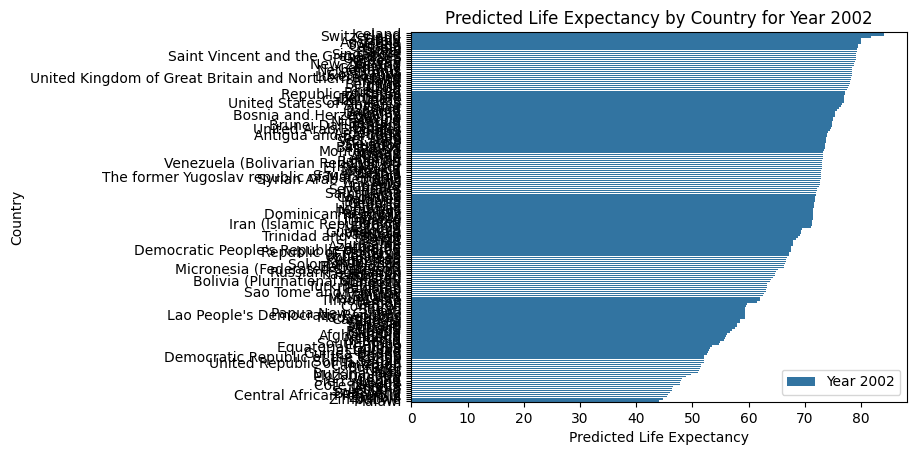

C:\Users\84395\AppData\Local\Temp\ipykernel_17956\773577916.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Life expectancy ', y = 'Country', data = year_data, label = f'Year {year}', orient = 'h', ci = None)


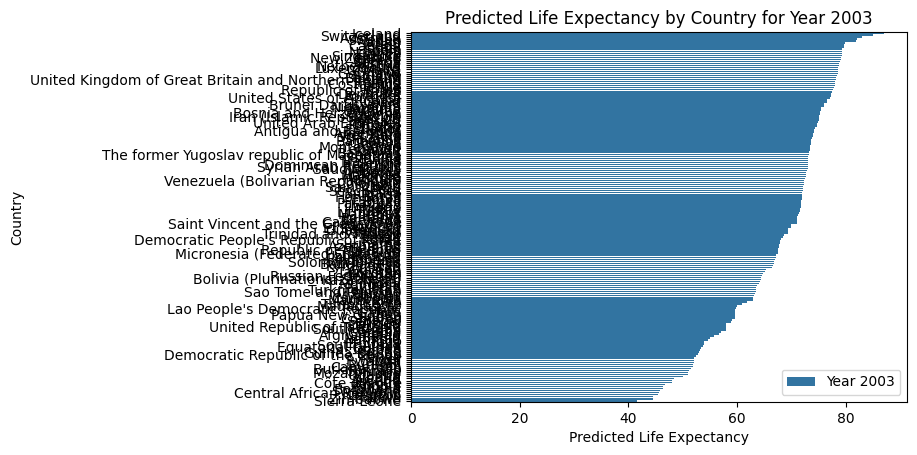

C:\Users\84395\AppData\Local\Temp\ipykernel_17956\773577916.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Life expectancy ', y = 'Country', data = year_data, label = f'Year {year}', orient = 'h', ci = None)


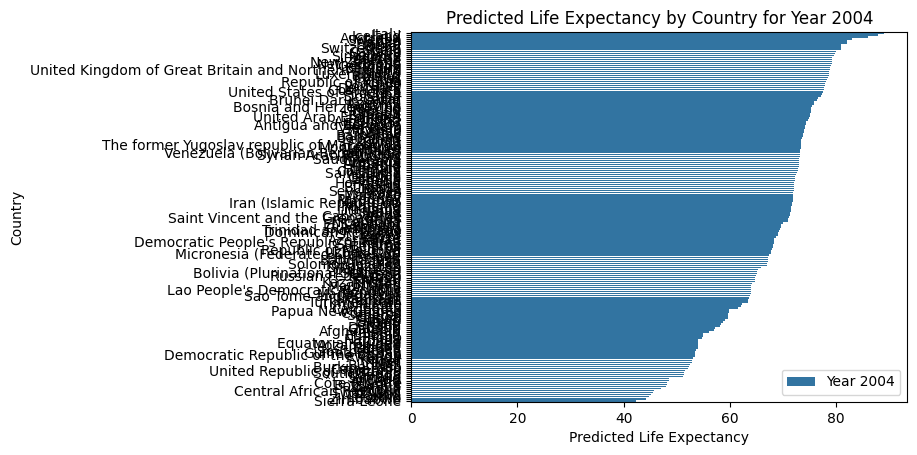

C:\Users\84395\AppData\Local\Temp\ipykernel_17956\773577916.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Life expectancy ', y = 'Country', data = year_data, label = f'Year {year}', orient = 'h', ci = None)


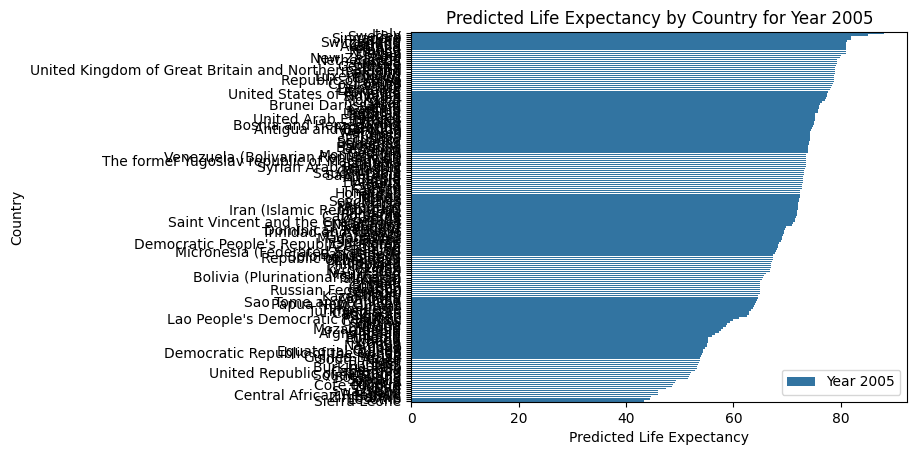

C:\Users\84395\AppData\Local\Temp\ipykernel_17956\773577916.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Life expectancy ', y = 'Country', data = year_data, label = f'Year {year}', orient = 'h', ci = None)


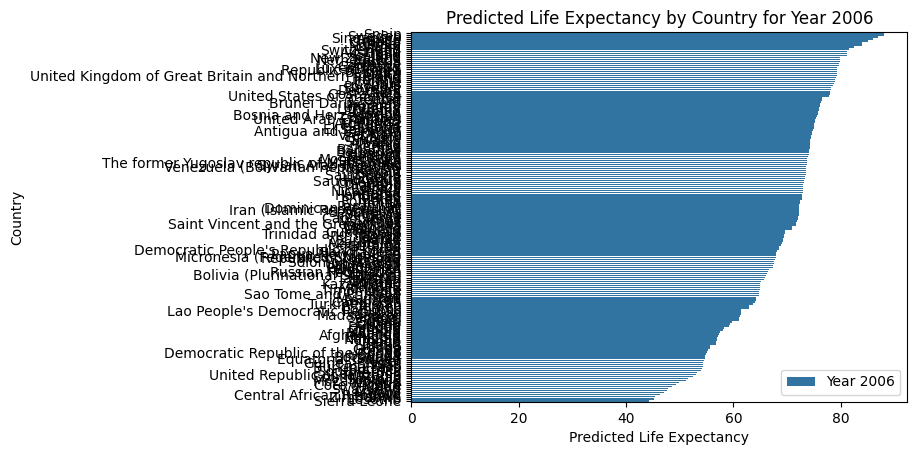

C:\Users\84395\AppData\Local\Temp\ipykernel_17956\773577916.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Life expectancy ', y = 'Country', data = year_data, label = f'Year {year}', orient = 'h', ci = None)


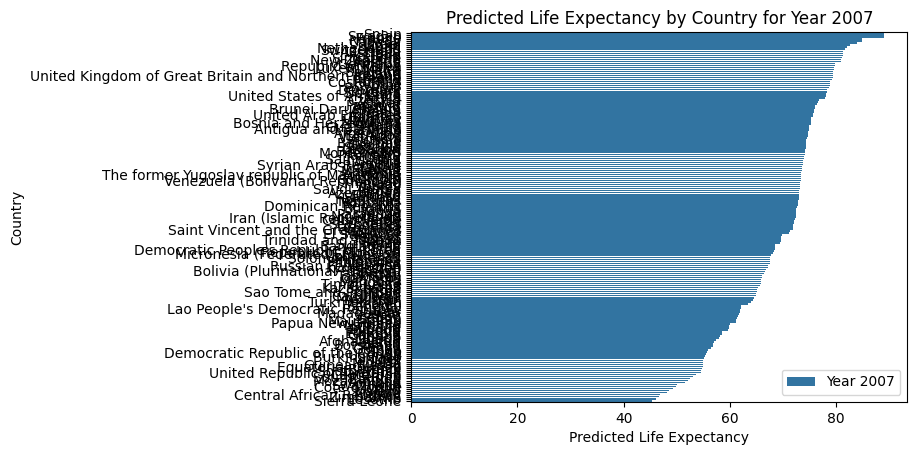

C:\Users\84395\AppData\Local\Temp\ipykernel_17956\773577916.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Life expectancy ', y = 'Country', data = year_data, label = f'Year {year}', orient = 'h', ci = None)


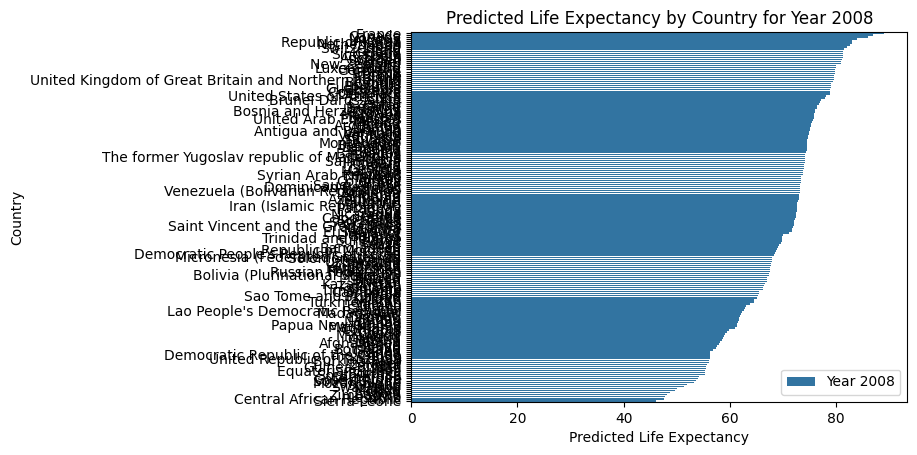

C:\Users\84395\AppData\Local\Temp\ipykernel_17956\773577916.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Life expectancy ', y = 'Country', data = year_data, label = f'Year {year}', orient = 'h', ci = None)


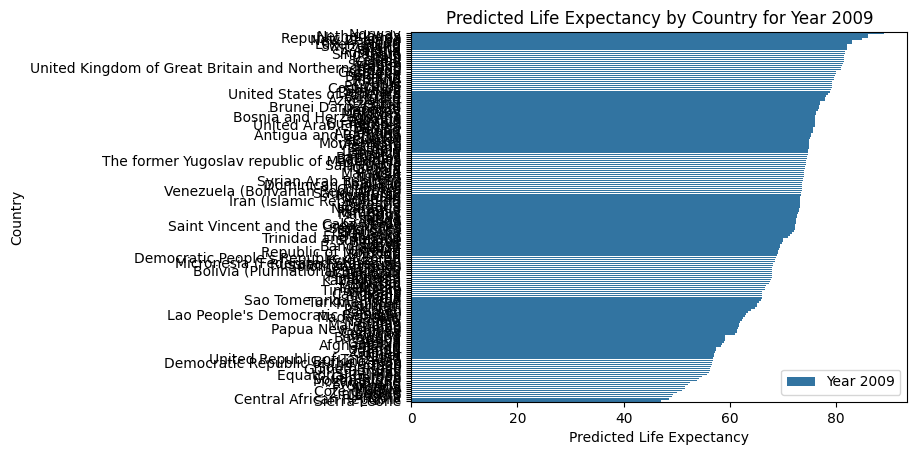

C:\Users\84395\AppData\Local\Temp\ipykernel_17956\773577916.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Life expectancy ', y = 'Country', data = year_data, label = f'Year {year}', orient = 'h', ci = None)


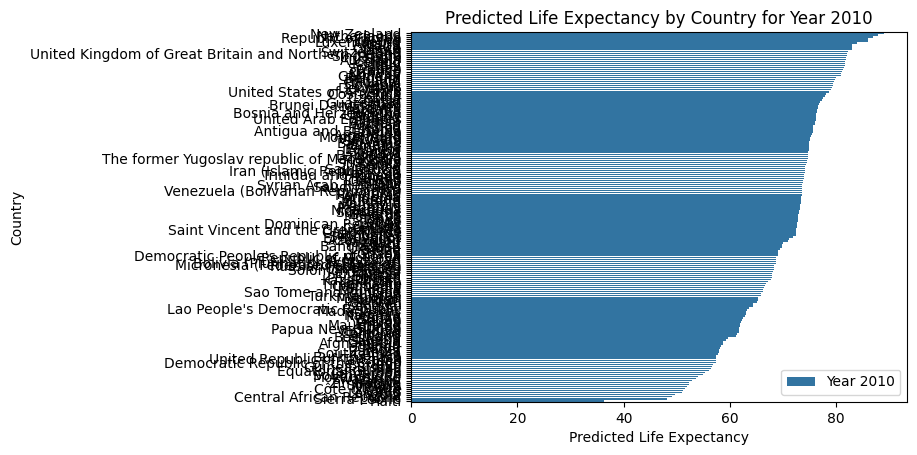

C:\Users\84395\AppData\Local\Temp\ipykernel_17956\773577916.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Life expectancy ', y = 'Country', data = year_data, label = f'Year {year}', orient = 'h', ci = None)


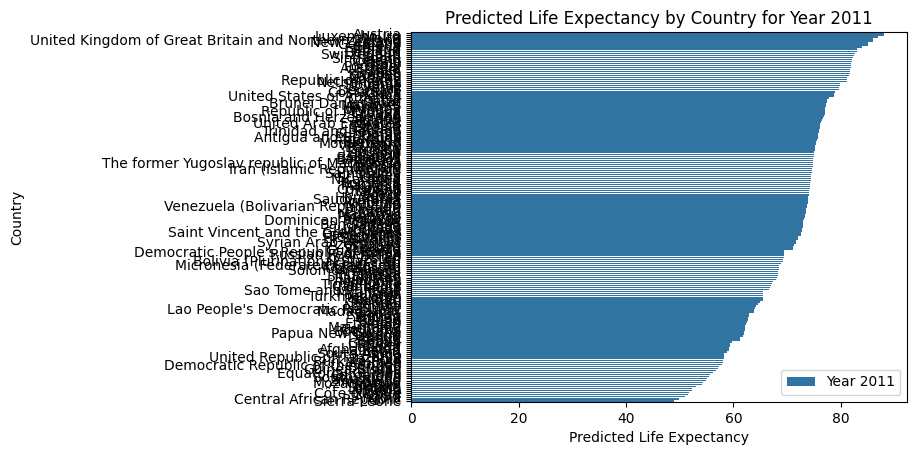

C:\Users\84395\AppData\Local\Temp\ipykernel_17956\773577916.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Life expectancy ', y = 'Country', data = year_data, label = f'Year {year}', orient = 'h', ci = None)


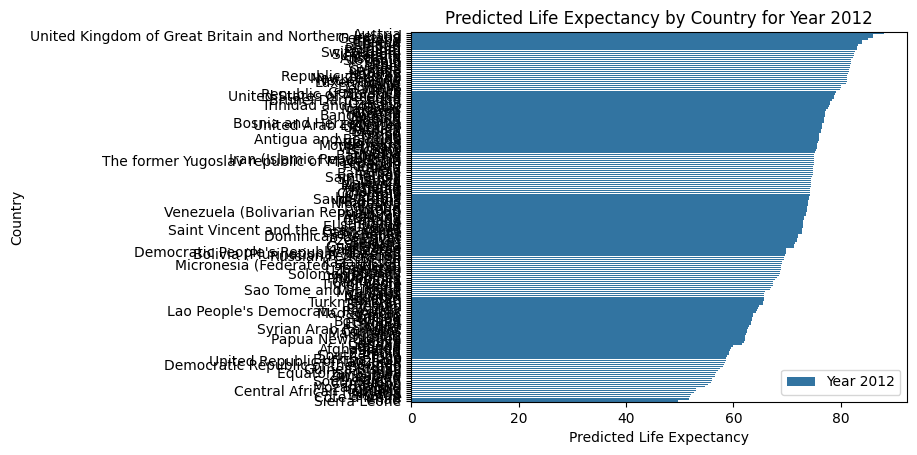

C:\Users\84395\AppData\Local\Temp\ipykernel_17956\773577916.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Life expectancy ', y = 'Country', data = year_data, label = f'Year {year}', orient = 'h', ci = None)


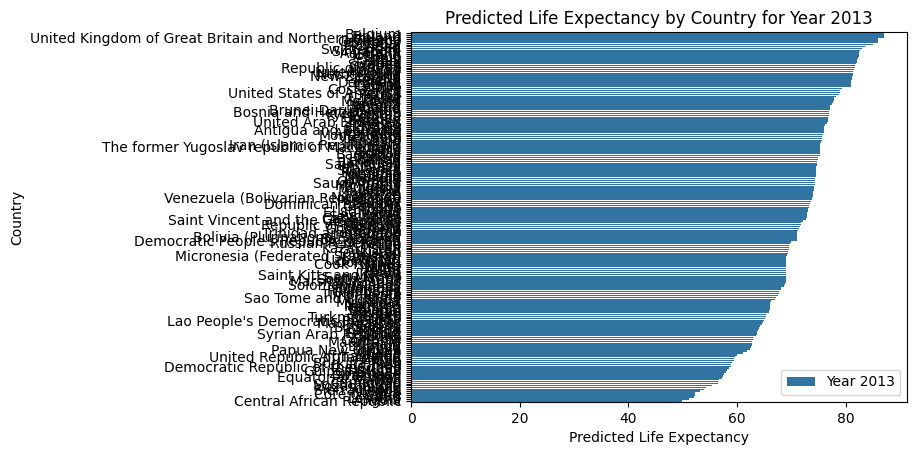

C:\Users\84395\AppData\Local\Temp\ipykernel_17956\773577916.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Life expectancy ', y = 'Country', data = year_data, label = f'Year {year}', orient = 'h', ci = None)


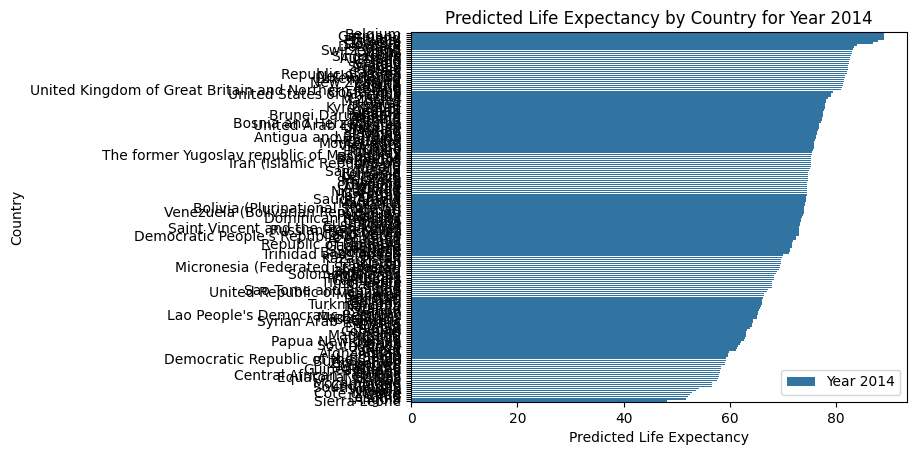

C:\Users\84395\AppData\Local\Temp\ipykernel_17956\773577916.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Life expectancy ', y = 'Country', data = year_data, label = f'Year {year}', orient = 'h', ci = None)


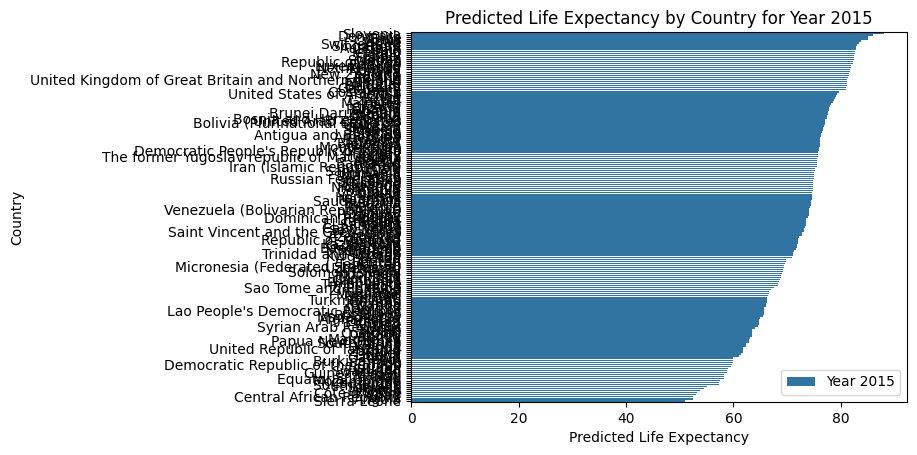

C:\Users\84395\AppData\Local\Temp\ipykernel_17956\773577916.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Predicted Life Expectancy', y = 'Country', data = year_data, label = f'Year {year}', orient = 'h', ci = None)


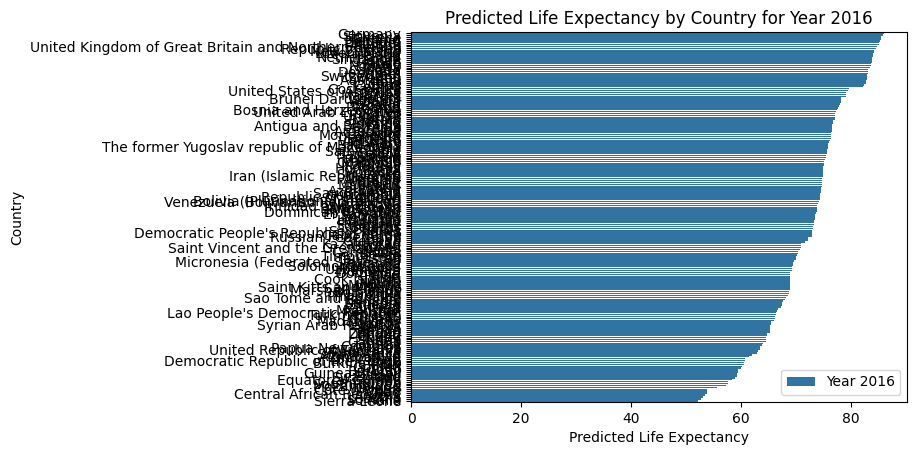

C:\Users\84395\AppData\Local\Temp\ipykernel_17956\773577916.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Predicted Life Expectancy', y = 'Country', data = year_data, label = f'Year {year}', orient = 'h', ci = None)


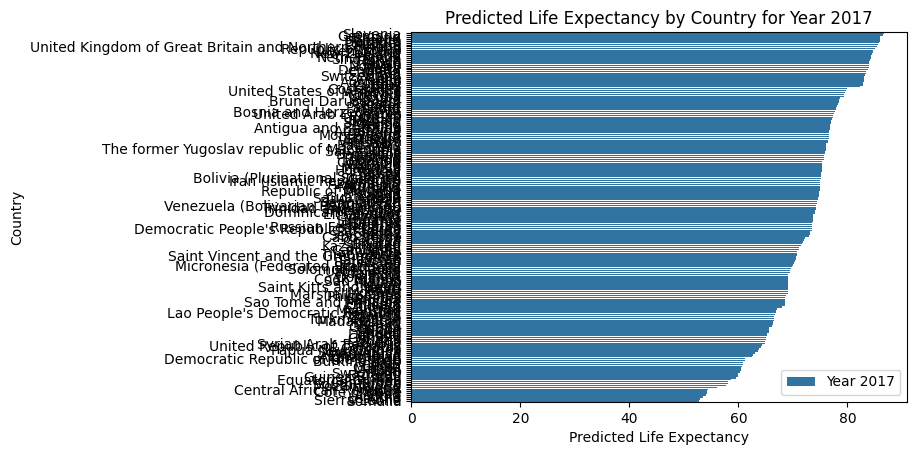

C:\Users\84395\AppData\Local\Temp\ipykernel_17956\773577916.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Predicted Life Expectancy', y = 'Country', data = year_data, label = f'Year {year}', orient = 'h', ci = None)


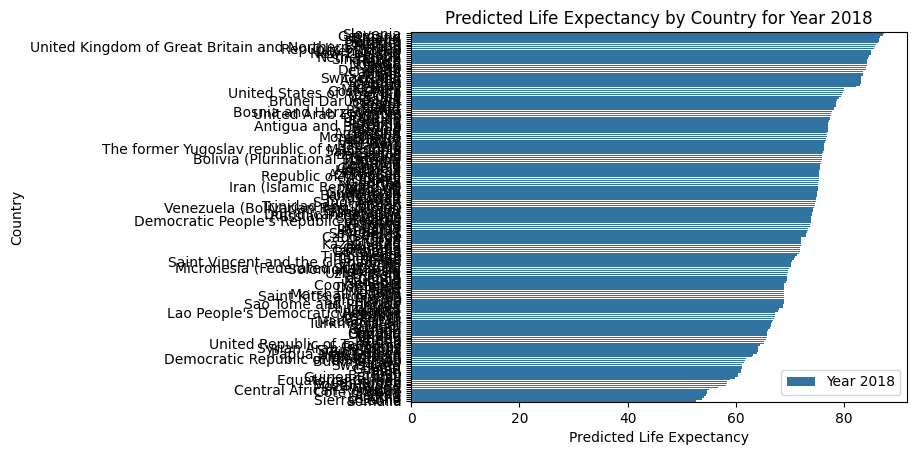

C:\Users\84395\AppData\Local\Temp\ipykernel_17956\773577916.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Predicted Life Expectancy', y = 'Country', data = year_data, label = f'Year {year}', orient = 'h', ci = None)


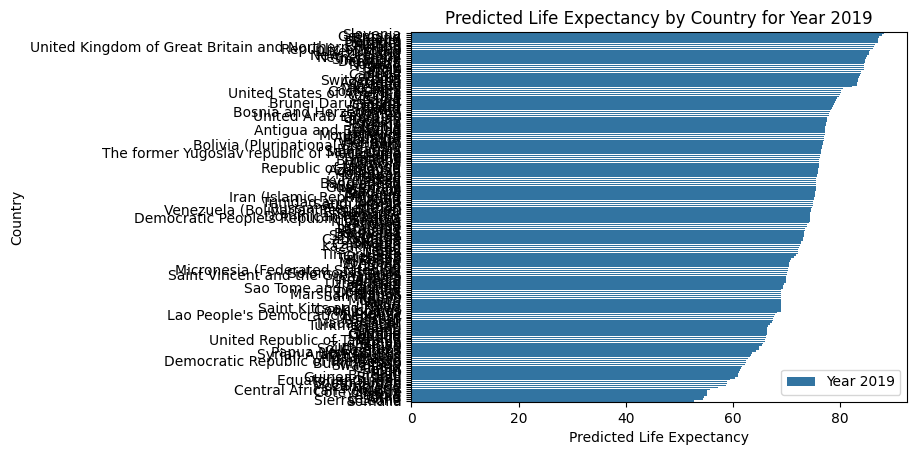

C:\Users\84395\AppData\Local\Temp\ipykernel_17956\773577916.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Predicted Life Expectancy', y = 'Country', data = year_data, label = f'Year {year}', orient = 'h', ci = None)


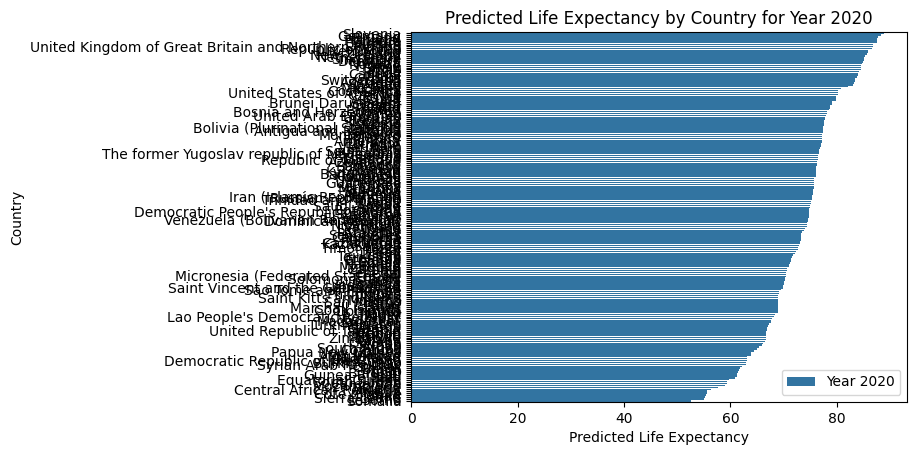

C:\Users\84395\AppData\Local\Temp\ipykernel_17956\773577916.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Predicted Life Expectancy', y = 'Country', data = year_data, label = f'Year {year}', orient = 'h', ci = None)


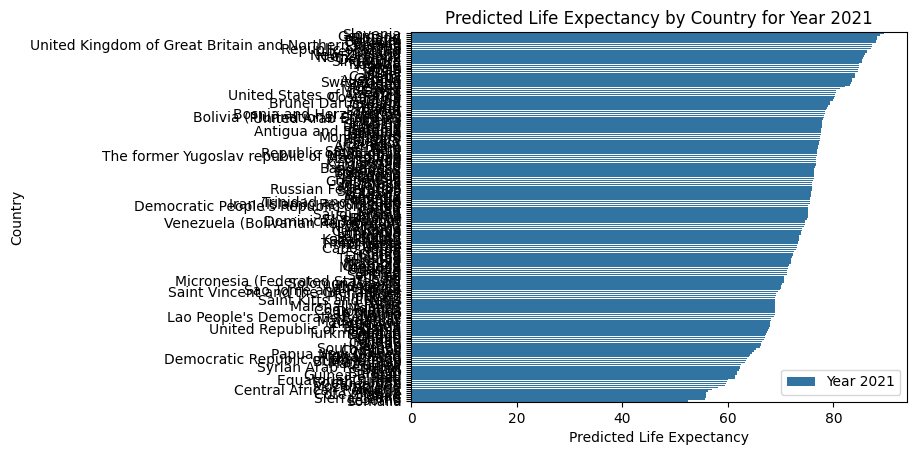

C:\Users\84395\AppData\Local\Temp\ipykernel_17956\773577916.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Predicted Life Expectancy', y = 'Country', data = year_data, label = f'Year {year}', orient = 'h', ci = None)


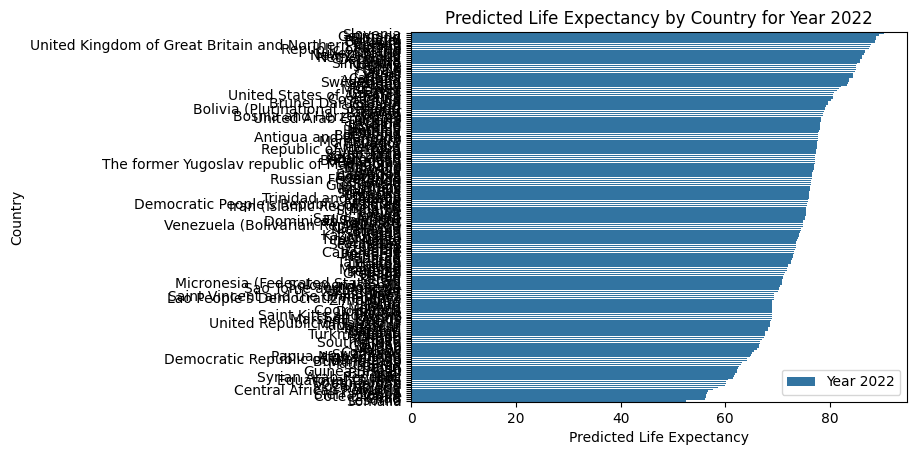

C:\Users\84395\AppData\Local\Temp\ipykernel_17956\773577916.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Predicted Life Expectancy', y = 'Country', data = year_data, label = f'Year {year}', orient = 'h', ci = None)


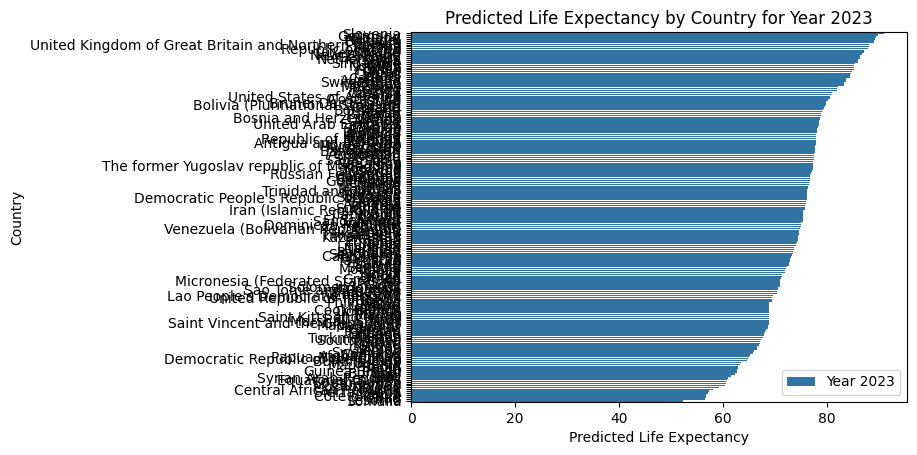

C:\Users\84395\AppData\Local\Temp\ipykernel_17956\773577916.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Predicted Life Expectancy', y = 'Country', data = year_data, label = f'Year {year}', orient = 'h', ci = None)


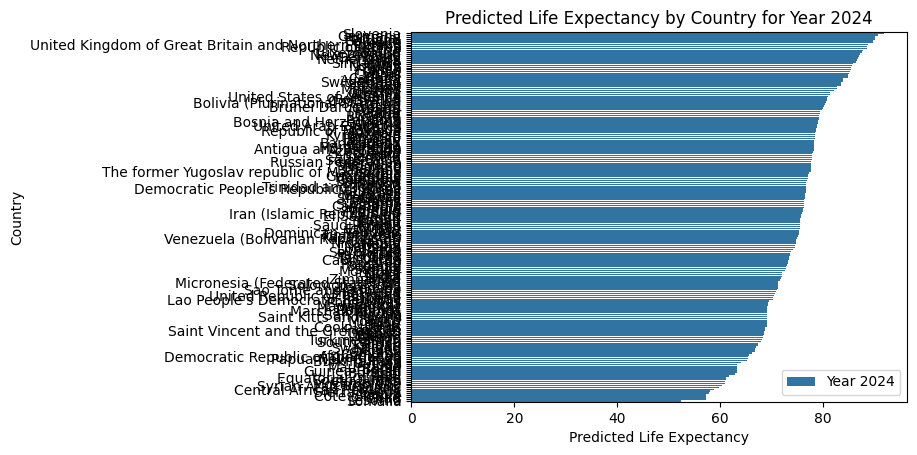

C:\Users\84395\AppData\Local\Temp\ipykernel_17956\773577916.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Predicted Life Expectancy', y = 'Country', data = year_data, label = f'Year {year}', orient = 'h', ci = None)


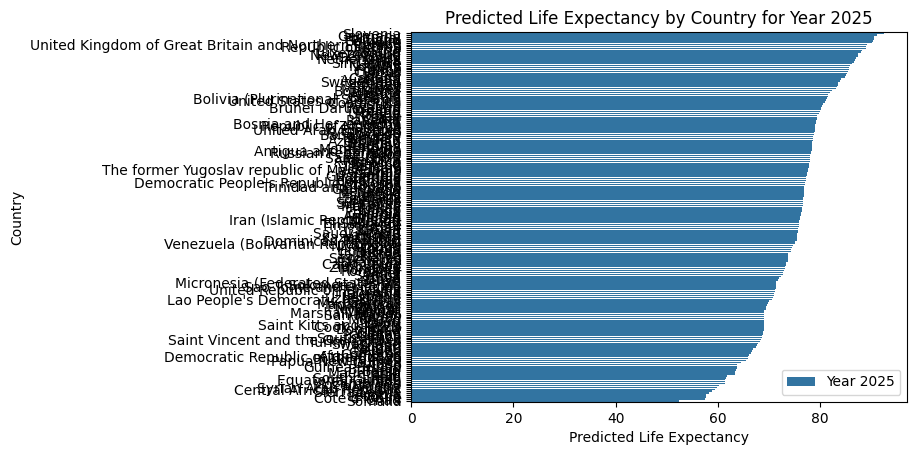

C:\Users\84395\AppData\Local\Temp\ipykernel_17956\773577916.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Predicted Life Expectancy', y = 'Country', data = year_data, label = f'Year {year}', orient = 'h', ci = None)


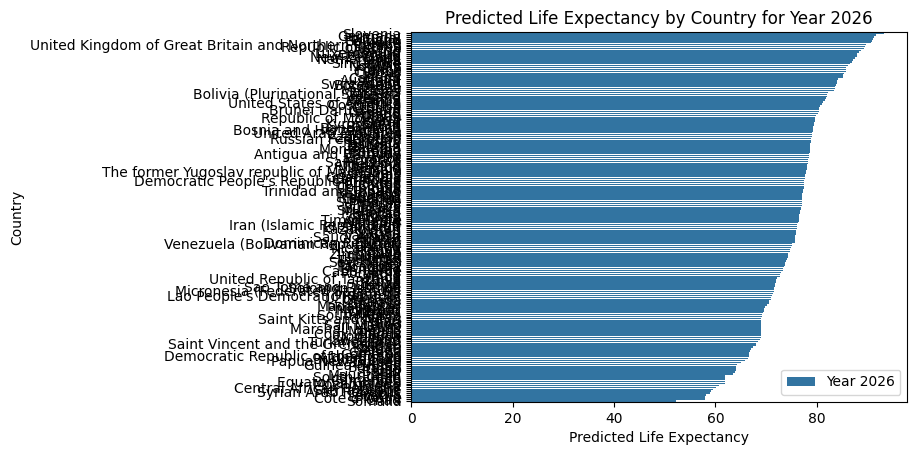

C:\Users\84395\AppData\Local\Temp\ipykernel_17956\773577916.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Predicted Life Expectancy', y = 'Country', data = year_data, label = f'Year {year}', orient = 'h', ci = None)


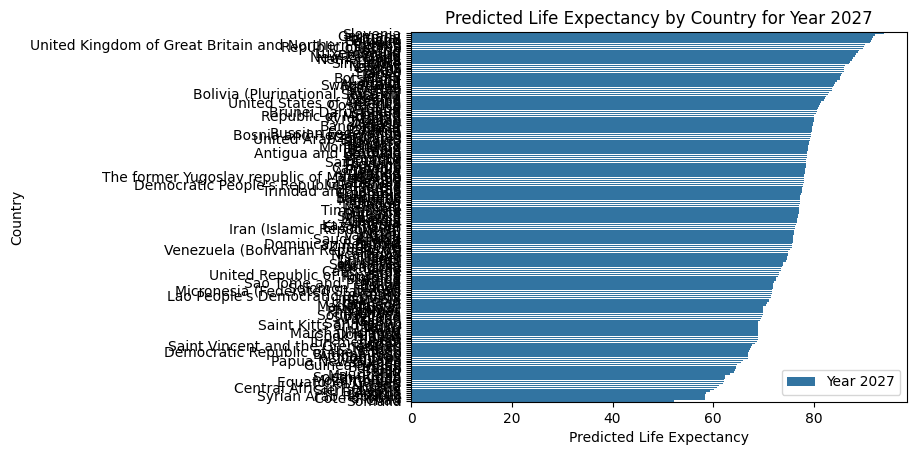

C:\Users\84395\AppData\Local\Temp\ipykernel_17956\773577916.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Predicted Life Expectancy', y = 'Country', data = year_data, label = f'Year {year}', orient = 'h', ci = None)


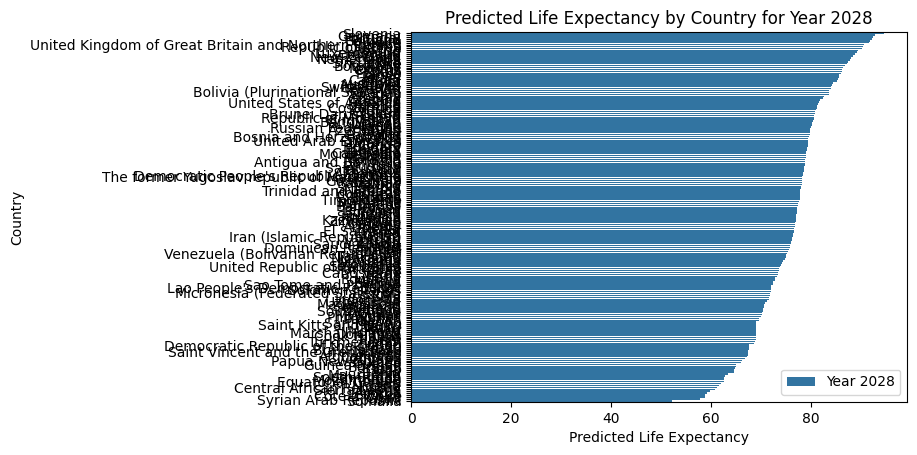

C:\Users\84395\AppData\Local\Temp\ipykernel_17956\773577916.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Predicted Life Expectancy', y = 'Country', data = year_data, label = f'Year {year}', orient = 'h', ci = None)


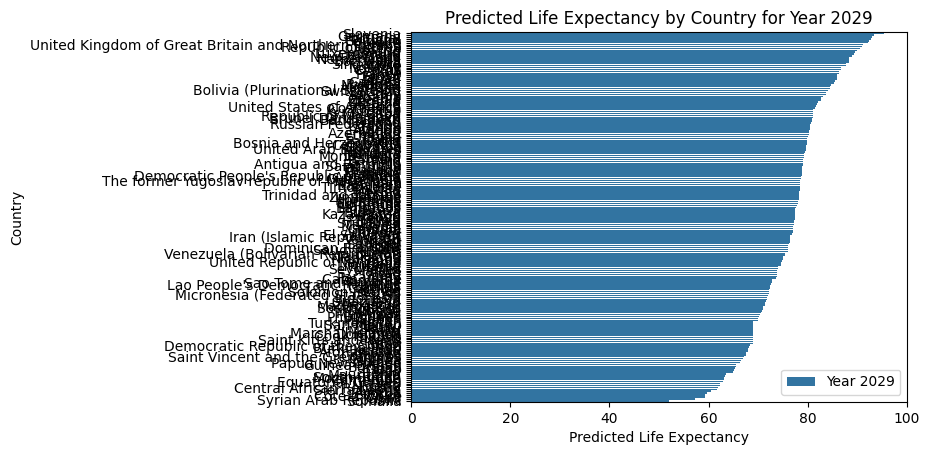

In [113]:
predictions = []

for country in df1['Country'].unique():
    country_data = df1[df1['Country'] == country]
    
    x = country_data[['Year']]
    y = country_data['Life expectancy ']
    
    model = LinearRegression()
    model.fit(x, y)
    
    future_years = pd.DataFrame({'Year': range(2016, 2030)})
    future_predictions = model.predict(future_years)
    
    for year, prediction in zip(future_years['Year'], future_predictions):
        predictions.append({'Country': country, 'Year': year, 'Predicted Life Expectancy': prediction})

pred_df = pd.DataFrame(predictions)

plt.figure(figsize = (15, 8))

for year in reversed(df1['Year'].unique()):
    year_data = df1[df1['Year'] == year]
    
    year_data = year_data.sort_values('Life expectancy ', ascending = False)
    
    sns.barplot(x = 'Life expectancy ', y = 'Country', data = year_data, label = f'Year {year}', orient = 'h', ci = None)
    
    plt.title(f'Predicted Life Expectancy by Country for Year {year}')
    plt.xlabel('Predicted Life Expectancy')
    plt.ylabel('Country')
    
    plt.show()

for year in pred_df['Year'].unique():
    year_data = pred_df[pred_df['Year'] == year]
    
    year_data = year_data.sort_values('Predicted Life Expectancy', ascending = False)
    
    sns.barplot(x = 'Predicted Life Expectancy', y = 'Country', data = year_data, label = f'Year {year}', orient = 'h', ci = None)
    
    plt.title(f'Predicted Life Expectancy by Country for Year {year}')
    plt.xlabel('Predicted Life Expectancy')
    plt.ylabel('Country')
    
    plt.show()
